# 算法原理

聚合层次聚类是一种自下而上的算法，首先将每个样本都视为一个簇，然后开始按一定规则，将相似度高的簇进行合并，最后所有样本都形成一个簇或达到某一个条件时，算法结束。

确定簇与簇之间相似度是该算法的要点，而这里的相似度是由簇间距离来确定的，簇间距离小的相似度高，簇间距离大的相似度低。

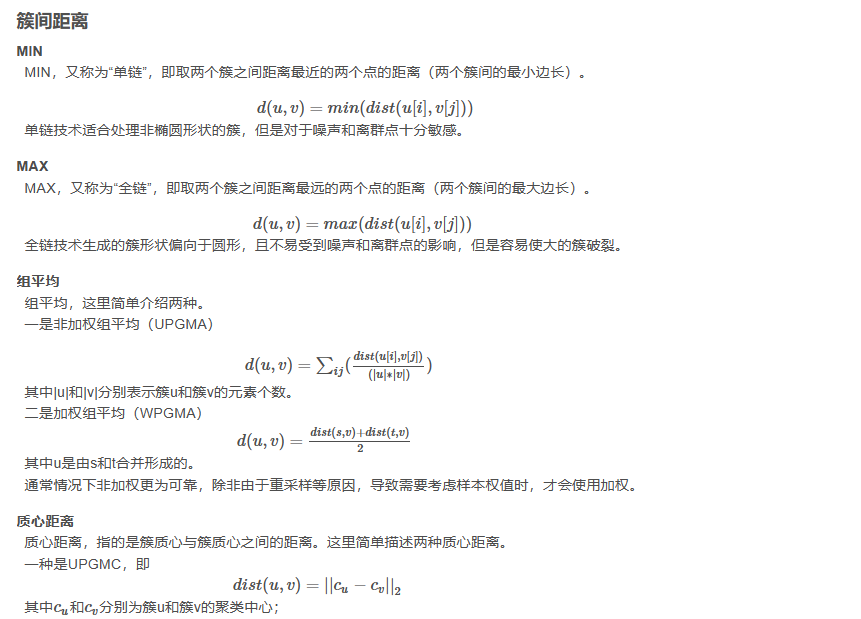

另一种是WPGMC，即新簇质心取合并的两个簇的质心均值(取质心的方法不同)。

使用质心距离计算簇间相似度的方法，与其他方法有一个明显的区别，就是用于计算距离的数据，可能是不存在于样本的数据。简而言之，使用其他方法计算簇间距离，都是基于簇中某个样本去跟另一个簇的某个样本计算，而合并后，计算的基础也还是簇中的样本，而使用质心距离，簇合并后，质心数据是会发生变化的，质心变化后，质心数据就可能不存在于样本数据里。

因而，在簇不断合并的过程中，其他方法计算簇间距离，簇间距离是递增的，而使用质心距离计算，簇间距离不一定递增。举个例子：在第K-1轮，簇s和簇t的簇间距离为a'，在第K轮，簇u（由簇s和簇t合并而来）和簇v的簇间距离为a。则若是使用质心距离计算得出的簇间距离a'和a，可能会有a<a'的情况（即合并后与簇v更相似）；而若是使用其他方法计算得出的簇间距离a'和a，则一定有a>a'(因为由于计算距离的数据不变，若a<a'，即意味有簇s（簇t）和簇v的簇间距离为a，则必定有簇s（簇t）与簇v先合并，而非簇s与簇t先合并)。


# 数据准备

In [5]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans # k均值
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False

In [6]:
#读取数据
data = pd.read_csv("../data/blobs.csv")
print(data.head())

           a         b  label
0  -0.794152  2.104951      0
1  -9.151552 -4.812864      1
2 -11.441826 -4.457814      1
3  -9.767618 -3.191337      1
4  -4.536556 -8.401863      2


In [7]:
#准备数据
data = data.dropna()
y = data['label']
x = data.drop(['label'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

## 肘部法获取最佳聚类数

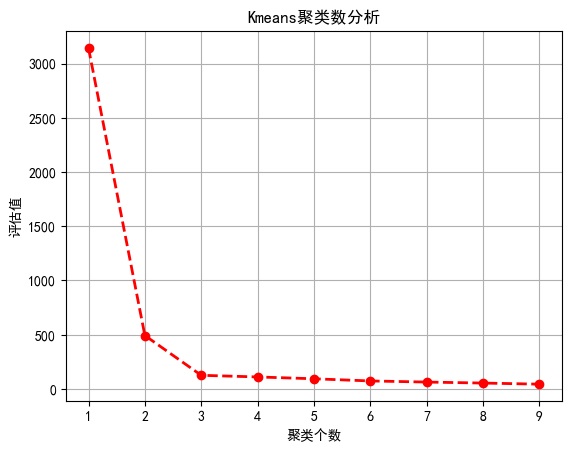

In [8]:
#使用SSE进行模型评估,
sse=[]
for i in range(1,10):
    cluster=KMeans(n_clusters=i,random_state=0, n_init= 'auto').fit(x_train)
    inertia=cluster.inertia_
    sse.append(inertia)
plt.plot(range(1,10),sse,color='red',linewidth=2.0,linestyle='--',marker='o',label='sse')
plt.grid(True)
plt.title("Kmeans聚类数分析")
plt.xlabel("聚类个数")
plt.ylabel("评估值")
plt.savefig("../images/Kmeans聚类数分析.png", dpi=600)
plt.show()

由上图可知，k=3为最佳。

# 模型训练

In [11]:
# 聚类模型
k = 3
model = AgglomerativeClustering(n_clusters=k)
model.fit(x_train)

AgglomerativeClustering(n_clusters=3)

Text(0, 0.5, 'Feature 1')

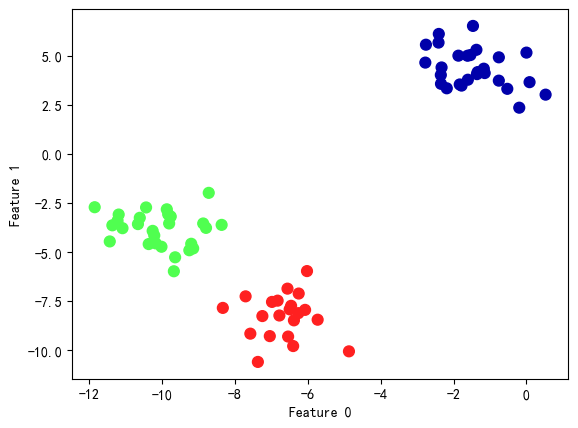

In [12]:
# 绘制聚类结果图
clusters = model.labels_
plt.scatter(x_train.values[:,0], x_train.values[:,1], c=clusters, cmap=mglearn.cm3, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# 模型保存

In [13]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../outputs/best_models/agg.pkl')

# 加载模型
model = joblib.load('../outputs/best_models/agg.pkl')

In [14]:
# 法二
import pickle

with open('../outputs/best_models/agg.pkl', 'wb') as f:
    pickle.dump(model, f)

#读取Model
with open('../outputs/best_models/agg.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [20]:
prediction = model.fit_predict(x_test)

In [21]:
# 计算准确率
acc = accuracy_score(y_test, prediction)
print("acc为：", acc)

acc为： 0.28


In [22]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        12

    accuracy                           0.28        25
   macro avg       0.33      0.33      0.33        25
weighted avg       0.28      0.28      0.28        25

